## 사전 준비(모델, 라이브러리 설치)_유라버전


*   `import segmentation_models as sm` 에러 발생 시 init 파일 클릭 하여 문제가 되는 문장 제거. init.py 저장 후 세션 재시작




In [1]:
!pip install segmentation_models


In [1]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [7]:
pip install --use-pep517

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


In [5]:
!pip install google.colab

     ---------------------------------------- 0.0/72.9 kB ? eta -:--:--
     ---------------- ----------------------- 30.7/72.9 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 72.9/72.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/64.2 kB ? eta -:--:--
     ---------------------------------------- 64.2/64.2 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/104.5 kB ? eta -:--:--
     -------------------------------------- 104.5/104.5 kB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/758.9 kB ? eta -:--:--
     ------------------------------------- 758.9/758.9 kB 24.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
     ----------- ---------------------------- 2.3/8.0 MB 49.7 MB/s eta 0:00:01
     ----------------------------- ---------- 5.8/8.0 MB 6

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      C:\Users\user\AppData\Local\Temp\pip-install-gl2k9j5s\pandas_02c889889b5b4e14b55af32717588cba\setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        import pkg_resources
      C:\Users\user\anaconda3\Lib\site-packages\setuptools\__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
      !!
      
              ********************************************************************************
              Requirements should be satisfied by a PEP 517 installer.
              If you are using pip, you can try `pip install --use-pep517`.
              ********************************************************************************
      
      !!
        dist.fetch_build_eggs(dist.setup_requires)
      error in pandas se

In [3]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import shutil
from tensorflow.keras.metrics import MeanIoU
import random

from zipfile import ZipFile
import tempfile





## 데이터 셋 다운로드

In [4]:

# 경로 설정
# drive.mount('/content/drive')


# 경로 설정
data_path="E:/01_AIFactory/01_jejudata/01_월동작물자동탐지드론영상/제주 월동작물 자동탐지 드론 영상/Train"
extracted_folder_path = 'E:/01_AIFactory/01_jejudata/01_월동작물자동탐지드론영상/제주 월동작물 자동탐지 드론 영상/Train/Label'


# # 압축파일 풀기
# with ZipFile(data_path + 'final_dataset.zip') as zipper:
#     zipper.extractall(extracted_folder_path)


# print("압축 파일을 성공적으로 풀었습니다.")


In [ ]:
# import os
# import shutil


# def folder_move(source_folder, destination_folder):
#   # 하위 폴더 생성
#   os.makedirs(destination_folder, exist_ok=True)

#   # 이미지 파일 이동
#   for filename in os.listdir(source_folder):
#       if filename.endswith('.jpg'):  # 이미지 파일만 이동하려면 해당 확장자로 수정하세요
#           source_path = os.path.join(source_folder, filename)
#           destination_path = os.path.join(destination_folder, filename)
#           shutil.move(source_path, destination_path)

#   print('이미지 파일을 하위 폴더로 이동했습니다.')



# val_images_folder = '/content/data/jeju_data_for_keras_aug2/val_images'
# d_val_images_folder = '/content/data/jeju_data_for_keras_aug2/val_images/val'
# folder_move(val_images_folder,d_val_images_folder)

# val_mask_folder = '/content/data/jeju_data_for_keras_aug2/val_mask'
# d_val_mask_folder = '/content/data/jeju_data_for_keras_aug2/val_mask/val'
# folder_move(val_mask_folder, d_val_mask_folder)


# train_images_folder = '/content/data/jeju_data_for_keras_aug2/train_images'
# d_train_images_folder = '/content/data/jeju_data_for_keras_aug2/train_images/train'
# folder_move(train_images_folder, d_train_images_folder)


# train_mask_folder = '/content/data/jeju_data_for_keras_aug2/train_mask'
# d_train_mask_folder = '/content/data/jeju_data_for_keras_aug2/train_mask/train'
# folder_move(train_mask_folder, d_train_mask_folder)


In [9]:
"""from google.colab.patches import cv2_imshow"""

#이미지 확인.
image_dir = 'E:/01_AIFactory/01_jejudata/01_월동작물자동탐지드론영상/제주 월동작물 자동탐지 드론 영상/Train/'
shutil.move(image_dir, "shutil_folder")
image_files = [f for f in os.listdir("shutil_folder") if f.endswith(".jpg")]

random_images = random.sample(image_files, 15)

for image_file in random_images:
    # 이미지 파일 로드
    image_path = os.path.join(image_dir, image_file)
    print(image_path)
    temp_mask = cv2.imread(image_path)
    print(temp_mask)

    # 라벨 및 카운트 출력
    labels, count = np.unique(temp_mask[:, :, 0], return_counts=True)
    # print(f"Labels for {image_file}: {labels}, Counts: {count}")

    if 0 in labels:
        print(f"Labels for {image_file} contain 0. {labels} Counts: {count}")
        origin_image_path = os.path.join('/content/data/content/final_dataset/train_images/train', image_file)
        # origin_image = cv2.imread(origin_image_path)
        img = cv2.imread(origin_image_path, cv2.IMREAD_COLOR)
        cv2.imshow(img)


KeyboardInterrupt: 

## 모델 설정

In [ ]:
# 모델 설정

from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical

seed=24
batch_size= 32
n_classes=9

#Use this to preprocess input for transfer learning
BACKBONE = 'resnext101' #resnet101 0.499
preprocess_input = sm.get_preprocessing(BACKBONE)

#Define a function to perform additional preprocessing after datagen.
#For example, scale images, convert masks to categorical, etc.
def preprocess_data(img, mask, num_class):
    #Scale images
    # img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = preprocess_input(img)  #Preprocess based on the pretrained backbone...
    #Convert mask to one-hot
    mask = to_categorical(mask, num_class)

    return (img,mask)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def trainGenerator(train_img_path, train_mask_path, num_class):
    # ImageDataGenerator에 적용할 인자 설정

    img_data_gen_args = dict(horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='reflect')

    # 이미지 및 마스크에 대한 ImageDataGenerator 객체 생성

    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)

    # flow_from_directory 함수를 통해 이미지 데이터 생성
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode=None,
        batch_size=batch_size,
        target_size=(256, 256),
        seed=seed)

    # flow_from_directory 함수를 통해 마스크 데이터 생성
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode=None,
        color_mode='grayscale',
        batch_size=batch_size,
        target_size=(256, 256),
        seed=seed)

    # 이미지 및 마스크 데이터를 결합하여 훈련 데이터 제너레이터 생성
    train_generator = zip(image_generator, mask_generator)

    # 훈련 데이터 제너레이터에서 이미지 및 마스크를 반복하여 전처리 및 출력
    for (img, mask) in train_generator:
        # 전처리 함수(preprocess_data)를 통해 이미지 및 마스크를 전처리
        img, mask = preprocess_data(img, mask, num_class)
        # 전처리된 이미지와 마스크를 반환
        yield (img, mask)


In [ ]:
train_img_path = '/content/images/'
train_mask_path = '/content/labels/'
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=9)

val_img_path = '/content/images/'
val_mask_path = '/content/labels/'
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=9)



Found 54209 images belonging to 1 classes.
Found 54209 images belonging to 1 classes.


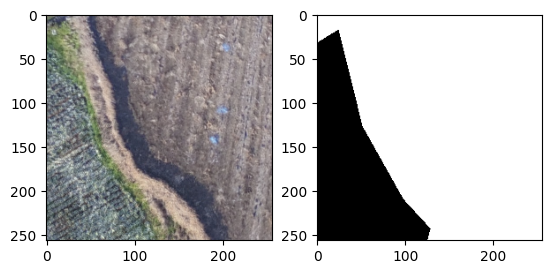

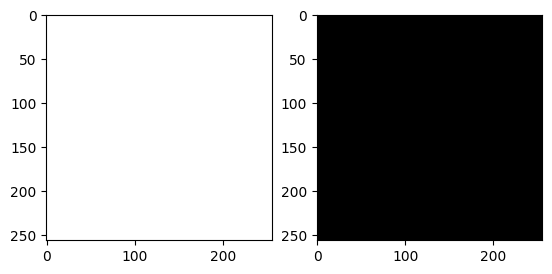

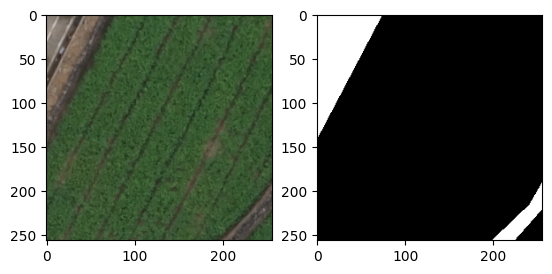

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
x, y = train_img_gen.__next__()

for i in range(0,3):
    image = x[i]
    image = image / 255


    mask = np.argmax(y[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.show()



In [ ]:
# import os
# import cv2
# import numpy as np

# # 이미지와 마스크 이미지가 저장된 경로
# image_dir = '/content/data/jeju_data_for_keras_aug_50000/train_images/train'
# mask_dir = '/content/data/jeju_data_for_keras_aug_50000/train_mask/train'

# # 이미지와 마스크 이미지의 확장자
# image_extension = '.jpg'
# mask_extension = '.jpg'

# # 이미지와 마스크 이미지 파일 목록 가져오기
# image_files = [f for f in os.listdir(image_dir) if f.endswith(image_extension)]
# mask_files = [f for f in os.listdir(mask_dir) if f.endswith(mask_extension)]

# # 이미지와 마스크 이미지 중에서 랜덤으로 5개 선택
# random_indices = random.sample(range(len(image_files)), k=5)
# random_image_files = [image_files[i] for i in random_indices]
# random_mask_files = [mask_files[i] for i in random_indices]

# # 선택된 이미지와 마스크 이미지 확인
# for image_file, mask_file in zip(random_image_files, random_mask_files):
#     # 이미지 파일 로드
#     image_path = os.path.join(image_dir, image_file)
#     image = cv2.imread(image_path)
#     if image is None:
#         print(f"이미지 파일 로드 실패: {image_path}")
#         continue

#     # 마스크 이미지 파일 로드
#     mask_path = os.path.join(mask_dir, mask_file)
#     mask = cv2.imread(mask_path)
#     if mask is None:
#         print(f"마스크 이미지 파일 로드 실패: {mask_path}")
#         continue

#     # 이미지 파일과 마스크 이미지 파일 출력
#     print(f"이미지 파일: {image_file}")
#     print(f"마스크 이미지 파일: {mask_file}")

#     # 마스크 이미지의 레이블과 개수 확인
#     unique_labels, label_counts = np.unique(mask, return_counts=True)
#     label_counts_dict = dict(zip(unique_labels, label_counts))
#     print("마스크 레이블 및 개수:")
#     for label, count in label_counts_dict.items():
#         print(f"레이블 {label}: 개수 {count}")
#     print()



Found 13893 images belonging to 1 classes.
Found 13893 images belonging to 1 classes.


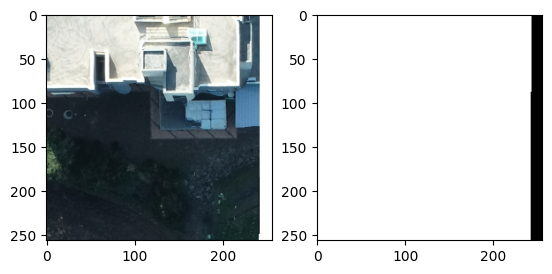

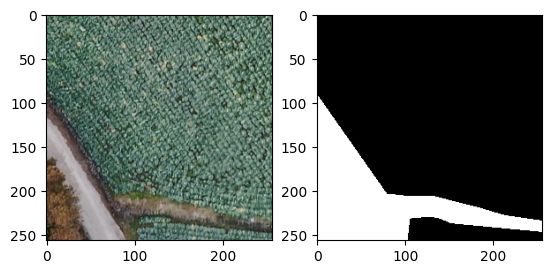

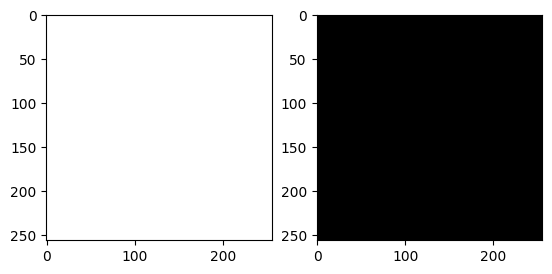

In [ ]:
x_val, y_val = val_img_gen.__next__()

for i in range(0,3):
    image = x_val[i]
    image = image / 255

    mask = np.argmax(y_val[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.show()


In [ ]:
import os
num_train_imgs = len(os.listdir('/content/data/content/final_dataset/train_images/train'))
num_val_images = len(os.listdir('/content/data/content/final_dataset/val_images/val'))

steps_per_epoch = num_train_imgs//batch_size
val_steps_per_epoch = num_val_images//batch_size

IMG_HEIGHT = x.shape[1]
IMG_WIDTH  = x.shape[2]
IMG_CHANNELS = x.shape[3]

n_classes=9

In [ ]:
model = sm.Unet(BACKBONE, encoder_weights='imagenet',
                input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
                classes=n_classes, activation='softmax')
model.compile('Adam', loss=sm.losses.categorical_focal_jaccard_loss, metrics=[sm.metrics.iou_score])

#Other losses to try: categorical_focal_dice_loss, cce_jaccard_loss, cce_dice_loss, categorical_focal_loss



173622728/173622728 [==============================] - 1s 0us/step


In [ ]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
print(model.summary())
print(model.input_shape)
#Fit the model
#history = model.fit(my_generator, validation_data=validation_datagen, steps_per_epoch=len(X_train) // 16, validation_steps=len(X_train) // 16, epochs=100)
#Train the model.

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 data (InputLayer)           [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 bn_data (BatchNormalizatio  (None, 256, 256, 3)          9         ['data[0][0]']                
 n)                                                                                               
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 262, 262, 3)          0         ['bn_data[0][0]']             
 g2D)                                                                                             
                                                                                            

## 모델 학습

In [ ]:
from keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백 설정: 가장 좋은(성능이 우수한) 모델 저장
checkpoint_best = ModelCheckpoint('best_model_70000.hdf5',
                                  monitor='val_loss',  # 모델 성능을 평가할 지표
                                  save_best_only=True,  # 가장 좋은 모델만 저장
                                  mode='min',  # 성능 지표가 감소해야 함 (예: 손실 함수에서 낮은 값이 더 좋음)
                                  verbose=1)

# ModelCheckpoint 콜백 설정: 마지막 에포크에서의 모델 저장
checkpoint_final = ModelCheckpoint('final_model_70000.hdf5',
                                   save_best_only=False,  # 모든 모델을 저장
                                   verbose=1)

# # 모델 훈련 시에 ModelCheckpoint 콜백 추가
# history = model.fit(train_img_gen,
#                     steps_per_epoch=steps_per_epoch,
#                     epochs=100,
#                     verbose=1,
#                     validation_data=val_img_gen,
#                     validation_steps=val_steps_per_epoch,
#                     callbacks=[checkpoint_best, checkpoint_final])

# # 최종 모델 저장
# model.save('landcover_final_model_50000.hdf5')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.callbacks import Callback

class LabelScoresCallback(Callback):
    def __init__(self, validation_data):
        super(LabelScoresCallback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        x_val, y_val = self.validation_data

        # 검증 데이터셋에서 예측 생성
        predictions = self.model.predict(x_val)

        # 각 라벨별 스코어를 계산할 변수 초기화
        scores = np.zeros(n_classes)

        # 각 라벨별로 스코어 계산
        for label_idx in range(n_classes):
            # 예측과 정답 라벨이 일치하는 픽셀 수 계산
            intersection = np.sum((predictions.argmax(axis=-1) == label_idx) & (y_val.argmax(axis=-1) == label_idx))

            # 예측된 라벨과 정답 라벨 중 해당 라벨이 있는 픽셀 수 계산
            union = np.sum((predictions.argmax(axis=-1) == label_idx) | (y_val.argmax(axis=-1) == label_idx))

            # 스코어 계산
            score = intersection / union

            # 각 라벨별 스코어 저장
            scores[label_idx] = score

        # 각 라벨별 스코어 출력
        for label_idx, score in enumerate(scores):
            print(f"Epoch {epoch + 1}: Label {label_idx}: Score = {score}")

# LabelScoresCallback 콜백을 생성하여 학습 시에 추가
label_scores_callback = LabelScoresCallback(validation_data=(x_val, y_val))


In [ ]:
from keras.models import load_model

# 가중치를 불러올 파일 경로
best_model_path = 'best_model_70000.hdf5'
final_model_path = '/content/drive/MyDrive/95-jeju-data/2024_JEJU_AI/코드/재경/240116resnext101_10epochs.hdf5'
landcover_final_model_path = 'landcover_final_model_70000.hdf5'

# 가중치 파일이 존재하는 경우에만 가중치를 불러옵니다.
try:
    model.load_weights(best_model_path)   # 가장 좋은 모델의 가중치를 불러옵니다.
    print("Loaded best model weights from disk")
except:
    print("No best model weights found")

try:
    model.load_weights(final_model_path)   # 마지막 에포크의 모델 가중치를 불러옵니다.
    print("Loaded final model weights from disk")
except:
    print("No final model weights found")

try:
    model = load_model(landcover_final_model_path)  # 최종 모델을 불러옵니다.
    print("Loaded landcover final model from disk")
except:
    print("No landcover final model found")

# 모델 훈련 시에 ModelCheckpoint 콜백 추가
history = model.fit(train_img_gen,
                    steps_per_epoch=steps_per_epoch,
                    epochs=50,
                    verbose=1,
                    validation_data=val_img_gen,
                    validation_steps=val_steps_per_epoch,
                    callbacks=[checkpoint_best, checkpoint_final,label_scores_callback])

# 최종 모델 저장
model.save('landcover_final_model_70000.hdf5')


No best model weights found
No final model weights found
No landcover final model found


NameError: name 'model' is not defined

라벨별 score 를 반환할 수 있는 LabelScoresCallback 클래스 정의

In [ ]:
# from keras.callbacks import Callback

# class LabelScoresCallback(Callback):
#     def __init__(self, validation_data):
#         super(LabelScoresCallback, self).__init__()
#         self.validation_data = validation_data

#     def on_epoch_end(self, epoch, logs=None):
#         x_val, y_val = self.validation_data

#         # 검증 데이터셋에서 예측 생성
#         predictions = self.model.predict(x_val)

#         # 각 라벨별 스코어를 계산할 변수 초기화
#         scores = np.zeros(n_classes)

#         # 각 라벨별로 스코어 계산
#         for label_idx in range(n_classes):
#             # 예측과 정답 라벨이 일치하는 픽셀 수 계산
#             intersection = np.sum((predictions.argmax(axis=-1) == label_idx) & (y_val.argmax(axis=-1) == label_idx))

#             # 예측된 라벨과 정답 라벨 중 해당 라벨이 있는 픽셀 수 계산
#             union = np.sum((predictions.argmax(axis=-1) == label_idx) | (y_val.argmax(axis=-1) == label_idx))

#             # 스코어 계산
#             score = intersection / union

#             # 각 라벨별 스코어 저장
#             scores[label_idx] = score

#         # 각 라벨별 스코어 출력
#         for label_idx, score in enumerate(scores):
#             print(f"Epoch {epoch + 1}: Label {label_idx}: Score = {score}")

# # LabelScoresCallback 콜백을 생성하여 학습 시에 추가
# label_scores_callback = LabelScoresCallback(validation_data=(x_val, y_val))


In [ ]:
# from keras.models import load_model

# # 가중치를 불러올 파일 경로
# best_model_path = 'best_model_50000.hdf5'
# final_model_path = 'final_model_50000.hdf5'
# landcover_final_model_path = 'landcover_final_model_50000.hdf5'

# # 가중치 파일이 존재하는 경우에만 가중치를 불러옵니다.
# try:
#     model.load_weights(best_model_path)   # 가장 좋은 모델의 가중치를 불러옵니다.
#     print("Loaded best model weights from disk")
# except:
#     print("No best model weights found")

# try:
#     model.load_weights(final_model_path)   # 마지막 에포크의 모델 가중치를 불러옵니다.
#     print("Loaded final model weights from disk")
# except:
#     print("No final model weights found")

# try:
#     model = load_model(landcover_final_model_path)  # 최종 모델을 불러옵니다.
#     print("Loaded landcover final model from disk")
# except:
#     print("No landcover final model found")

# # 모델 훈련 시에 ModelCheckpoint 콜백 추가
# history = model.fit(train_img_gen,
#                     steps_per_epoch=steps_per_epoch,
#                     epochs=1,
#                     verbose=1,
#                     validation_data=val_img_gen,
#                     validation_steps=val_steps_per_epoch,
#                     callbacks=[checkpoint_best, checkpoint_final, label_scores_callback])

# # 최종 모델 저장
# model.save('landcover_final_model_50000.hdf5')


Loaded best model weights from disk
Loaded final model weights from disk
No landcover final model found
1250/1250 [==============================] - ETA: 0s - loss: 0.4749 - iou_score: 0.5581
Epoch 1: val_loss improved from 0.48649 to 0.47931, saving model to best_model_50000.hdf5

Epoch 1: saving model to final_model_50000.hdf5
1/1 [==============================] - 1s 888ms/step
Epoch 1: Label 0: Score = 0.7543197023821271
Epoch 1: Label 1: Score = 0.9273127589464367
Epoch 1: Label 2: Score = 0.9932726305579023
Epoch 1: Label 3: Score = 0.9235909870483174
Epoch 1: Label 4: Score = 0.46243347156696496
Epoch 1: Label 5: Score = 0.0
Epoch 1: Label 6: Score = 0.8710628945368014
Epoch 1: Label 7: Score = 0.6774861596439135
Epoch 1: Label 8: Score = 0.795840422735887
1250/1250 [==============================] - 846s 677ms/step - loss: 0.4749 - iou_score: 0.5581 - val_loss: 0.4793 - val_iou_score: 0.5526


## 학습 완료된 파일 구글 드라이브로 저장

In [ ]:


import shutil

# 복사할 파일들의 현재 경로를 지정합니다.
source_files = ["/content/best_model_70000.hdf5", "/content/final_model_70000.hdf5", "/content/landcover_final_model_70000.hdf5"]

# 파일을 복사하고 싶은 Google Drive의 경로를 지정합니다.
destination = "/content/drive/MyDrive/2024_JEJU_AI_personnel"

# 각 파일을 복사합니다.
for source_file in source_files:
    shutil.copy(source_file, destination)


##예측하기 (수정중)

In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model("/content/landcover_final_model_70000.hdf5", compile=False)

In [ ]:
test_image_batch, test_mask_batch = val_img_gen.__next__()

In [ ]:
y_pred=model.predict(test_image_batch)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_argmax = np.argmax(test_mask_batch, axis=3)

1/1 [==============================] - 1s 1s/step


In [ ]:
#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 9

IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.51769423


In [ ]:
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

class0_IoU = values[0, 0] / np.sum(values[0, :])
class1_IoU = values[1, 1] / np.sum(values[1, :])
class2_IoU = values[2, 2] / np.sum(values[2, :])
class3_IoU = values[3, 3] / np.sum(values[3, :])
class4_IoU = values[4, 4] / np.sum(values[4, :])
class5_IoU = values[5, 5] / np.sum(values[5, :])
class6_IoU = values[6, 6] / np.sum(values[6, :])
class7_IoU = values[7, 7] / np.sum(values[7, :])
class8_IoU = values[8, 8] / np.sum(values[8, :])

print("IoU for class0 is:", class0_IoU)
print("IoU for class1 is:", class1_IoU)
print("IoU for class2 is:", class2_IoU)
print("IoU for class3 is:", class3_IoU)
print("IoU for class4 is:", class4_IoU)
print("IoU for class5 is:", class5_IoU)
print("IoU for class6 is:", class6_IoU)
print("IoU for class7 is:", class7_IoU)
print("IoU for class8 is:", class8_IoU)


[[1.276000e+04 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 1.213700e+04]
 [0.000000e+00 2.006260e+05 4.700000e+01 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 2.490000e+02 3.608000e+03]
 [0.000000e+00 3.224400e+04 3.010730e+05 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 1.110000e+02 3.100000e+03]
 [0.000000e+00 1.632700e+04 0.000000e+00 1.776730e+05 0.000000e+00
  2.653000e+03 1.700000e+01 4.400000e+01 2.432800e+04]
 [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 5.378800e+04
  0.000000e+00 0.000000e+00 0.000000e+00 9.800000e+01]
 [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 3.249500e+04
  5.000000e+00 7.900000e+01 0.000000e+00 2.274000e+03]
 [0.000000e+00 3.400000e+01 5.000000e+00 2.092100e+04 0.000000e+00
  0.000000e+00 0.000000e+00 4.658700e+04 4.874800e+04]
 [7.700000e+01 1.114900e

<ipython-input-54-4a9d94759a66>:9: RuntimeWarning: invalid value encountered in float_scalars
  class5_IoU = values[5, 5] / np.sum(values[5, :])


test_img_input의 shape:  (1, 256, 256, 3)
1/1 [==============================] - 2s 2s/step


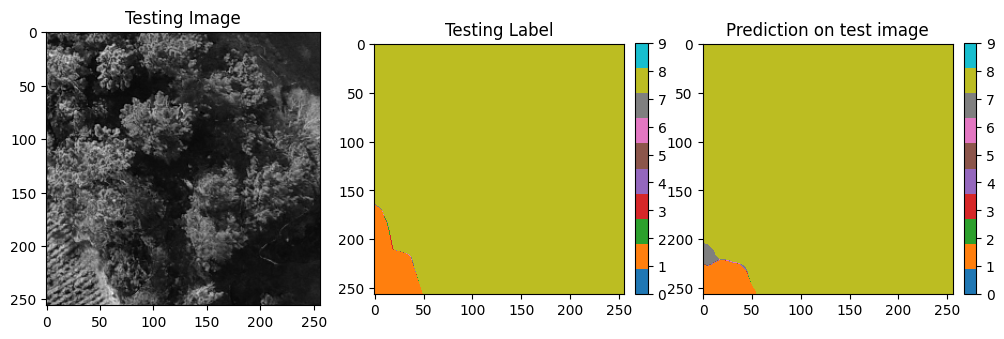

test_img_input의 shape:  (1, 256, 256, 3)
1/1 [==============================] - 0s 23ms/step


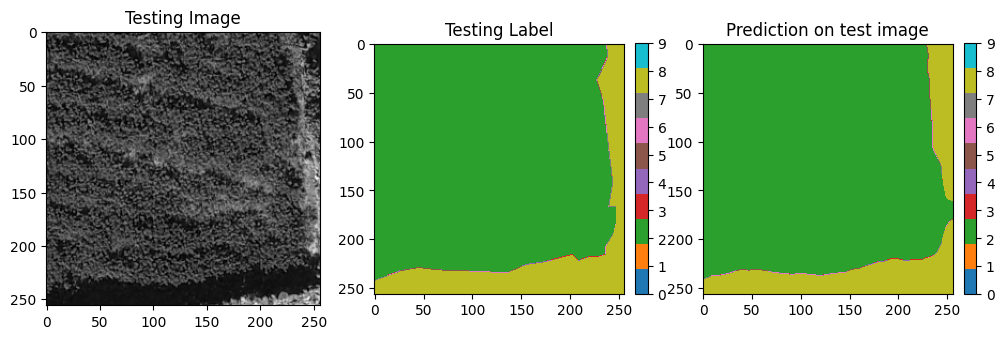

test_img_input의 shape:  (1, 256, 256, 3)
1/1 [==============================] - 0s 21ms/step


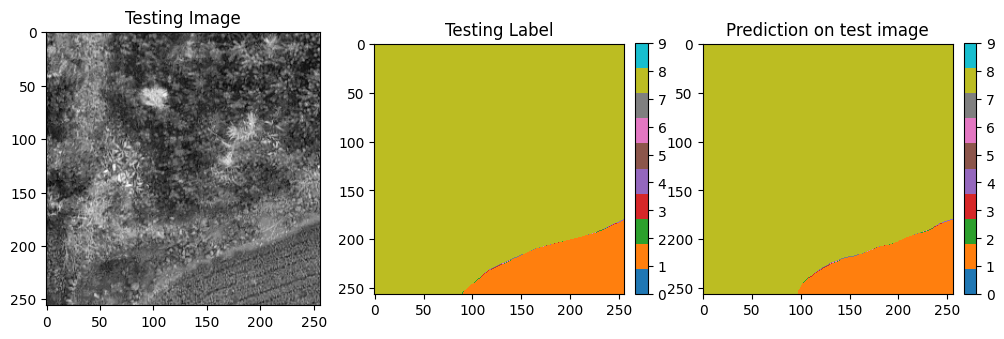

test_img_input의 shape:  (1, 256, 256, 3)
1/1 [==============================] - 0s 34ms/step


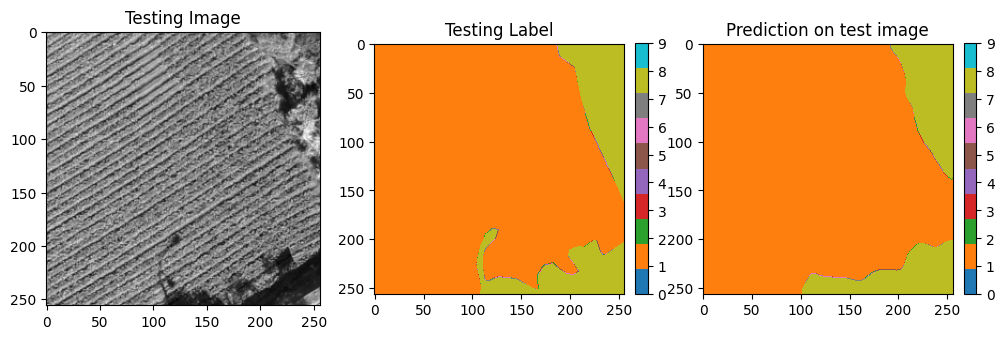

test_img_input의 shape:  (1, 256, 256, 3)
1/1 [==============================] - 0s 36ms/step


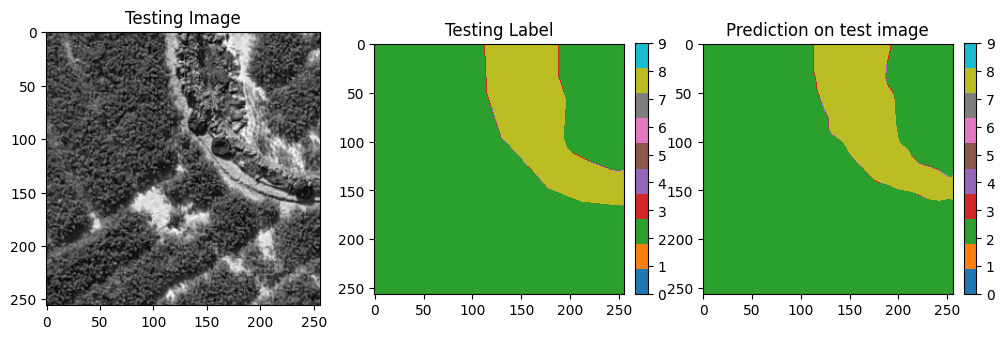

test_img_input의 shape:  (1, 256, 256, 3)
1/1 [==============================] - 0s 46ms/step


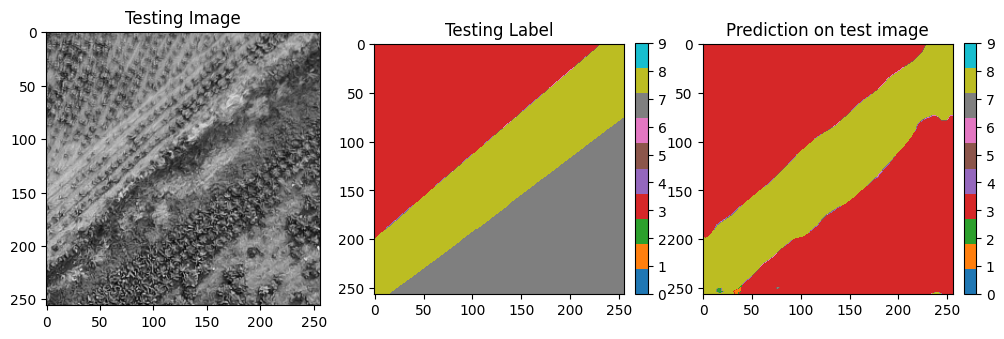

test_img_input의 shape:  (1, 256, 256, 3)
1/1 [==============================] - 0s 59ms/step


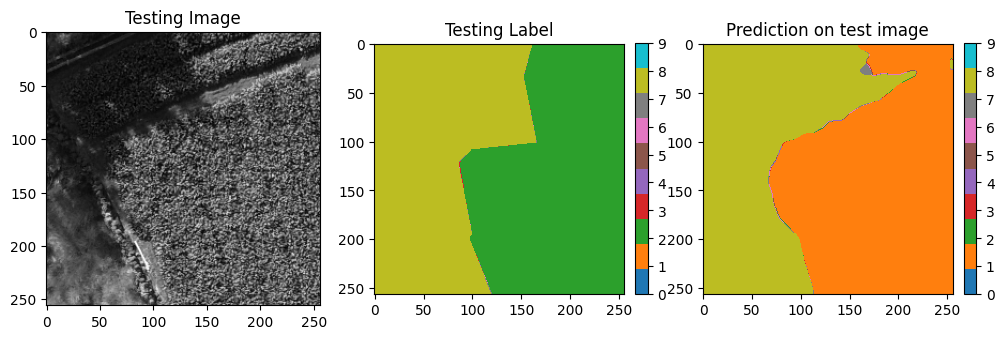

test_img_input의 shape:  (1, 256, 256, 3)
1/1 [==============================] - 0s 27ms/step


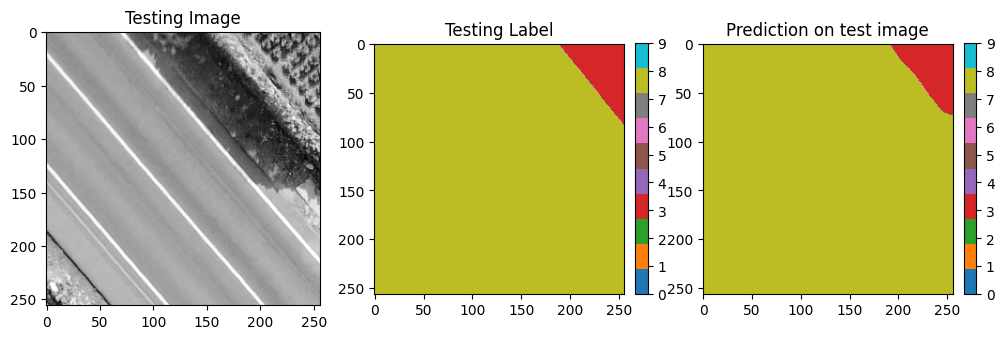

test_img_input의 shape:  (1, 256, 256, 3)
1/1 [==============================] - 0s 23ms/step


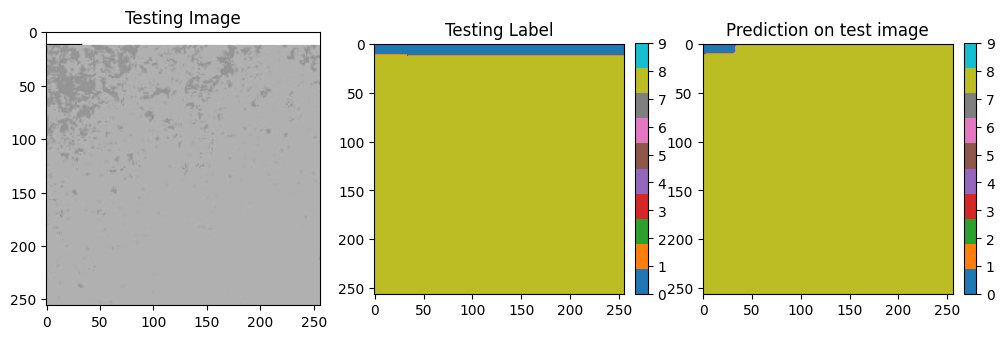

test_img_input의 shape:  (1, 256, 256, 3)
1/1 [==============================] - 0s 21ms/step


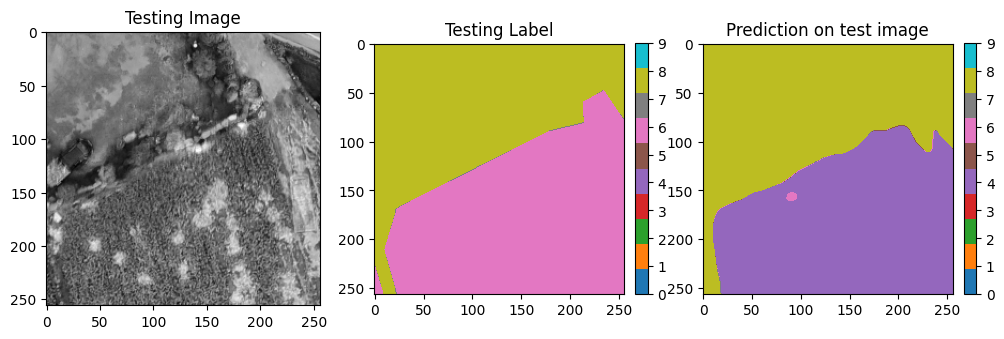

In [ ]:
from matplotlib.colors import ListedColormap

# Create a colormap
cmap = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Predict on a few images
#model = get_model()
#model.load_weights('???.hdf5')
import random
for i in range(10):
  test_img_number = random.randint(0, len(test_image_batch)-1)
  test_img = test_image_batch[test_img_number]
  ground_truth=test_mask_batch[test_img_number]
  ground_truth = np.argmax(ground_truth, axis=2)
  test_img_norm = test_img[:,:,:]
  test_img_input = np.expand_dims(test_img_norm, 0)
  print("test_img_input의 shape: ", test_img_input.shape)

  prediction = (model.predict(test_img_input))
  predicted_img=np.argmax(prediction, axis=3)[0,:,:]

  plt.figure(figsize=(12, 8))

  # Testing Image
  plt.subplot(131)
  plt.title('Testing Image')
  plt.imshow(test_img[:,:,0], cmap='gray')

  # Testing Label
  plt.subplot(132)
  plt.title('Testing Label')
  im1 = plt.imshow(ground_truth, cmap=cmap, vmin=0, vmax=9)    # vmin, vmax to set the colorbar range
  plt.colorbar(im1, fraction=0.046, pad=0.04, ticks=range(10))  # ticks to set the colorbar ticks

  # Prediction on test image
  plt.subplot(133)
  plt.title('Prediction on test image')
  im2 = plt.imshow(predicted_img, cmap=cmap, vmin=0, vmax=9)  # vmin, vmax to set the colorbar range
  plt.colorbar(im2, fraction=0.046, pad=0.04, ticks=range(10))  # ticks to set the colorbar ticks

  plt.show()


이전 모델로 예측


In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model("/content/drive/MyDrive/2024_JEJU_AI_personnel/final_model_50000.hdf5", compile=False)

In [ ]:
y_pred=model.predict(test_image_batch)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_argmax = np.argmax(test_mask_batch, axis=3)

1/1 [==============================] - 1s 800ms/step


In [ ]:
#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 9

IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.57033217


In [ ]:
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

class0_IoU = values[0, 0] / np.sum(values[0, :])
class1_IoU = values[1, 1] / np.sum(values[1, :])
class2_IoU = values[2, 2] / np.sum(values[2, :])
class3_IoU = values[3, 3] / np.sum(values[3, :])
class4_IoU = values[4, 4] / np.sum(values[4, :])
class5_IoU = values[5, 5] / np.sum(values[5, :])
class6_IoU = values[6, 6] / np.sum(values[6, :])
class7_IoU = values[7, 7] / np.sum(values[7, :])
class8_IoU = values[8, 8] / np.sum(values[8, :])

print("IoU for class0 is:", class0_IoU)
print("IoU for class1 is:", class1_IoU)
print("IoU for class2 is:", class2_IoU)
print("IoU for class3 is:", class3_IoU)
print("IoU for class4 is:", class4_IoU)
print("IoU for class5 is:", class5_IoU)
print("IoU for class6 is:", class6_IoU)
print("IoU for class7 is:", class7_IoU)
print("IoU for class8 is:", class8_IoU)


[[1.35774e+05 3.73990e+04 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 5.49320e+04]
 [0.00000e+00 1.53274e+05 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 3.17900e+03 3.24840e+04]
 [7.87000e+02 0.00000e+00 1.96178e+05 0.00000e+00 3.30000e+01 0.00000e+00
  0.00000e+00 3.13310e+04 1.13260e+04]
 [1.90990e+04 9.20000e+01 0.00000e+00 1.76289e+05 0.00000e+00 0.00000e+00
  2.86900e+04 0.00000e+00 6.68000e+03]
 [2.10000e+01 0.00000e+00 2.88400e+04 0.00000e+00 3.85050e+04 0.00000e+00
  0.00000e+00 1.31544e+05 2.08600e+03]
 [3.36000e+02 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 4.45610e+04
  0.00000e+00 9.50000e+01 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  6.47790e+04 0.00000e+00 1.40000e+03]
 [1.83700e+03 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.60850e+04 8.95800e+03]
 [2.13600e+03 6.52000e+02 1.37020e+04 2.15000e+03 1.71100e+03 1.98580e+04
  1.31700e+03 3.12200e

test_img_input의 shape:  (1, 256, 256, 3)
1/1 [==============================] - 0s 24ms/step


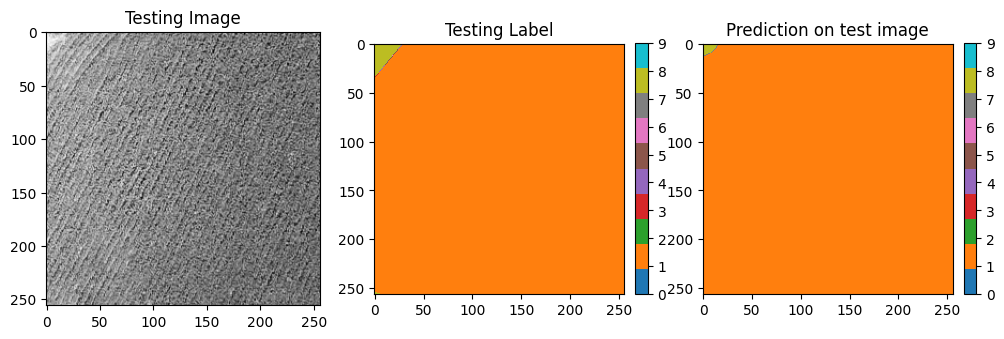

test_img_input의 shape:  (1, 256, 256, 3)
1/1 [==============================] - 0s 22ms/step


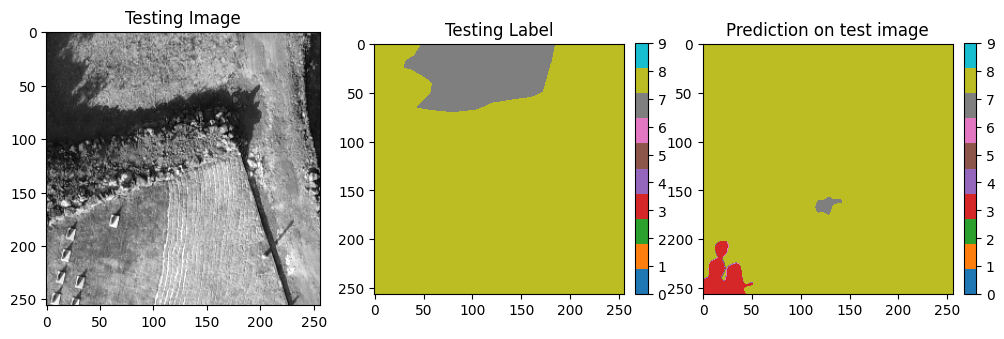

test_img_input의 shape:  (1, 256, 256, 3)
1/1 [==============================] - 0s 21ms/step


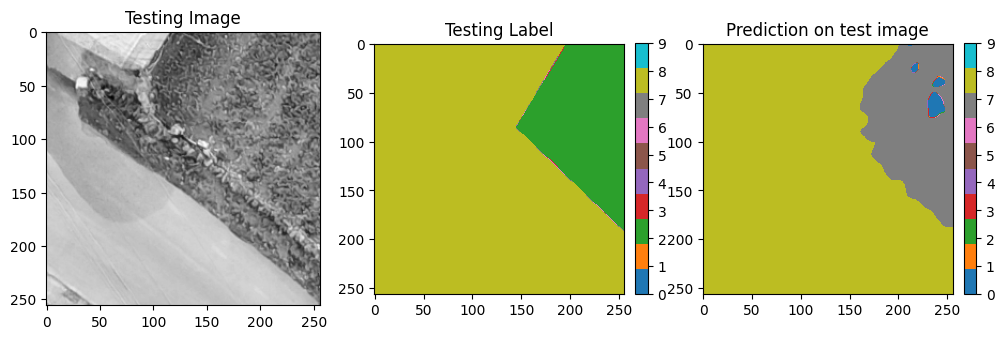

test_img_input의 shape:  (1, 256, 256, 3)
1/1 [==============================] - 0s 22ms/step


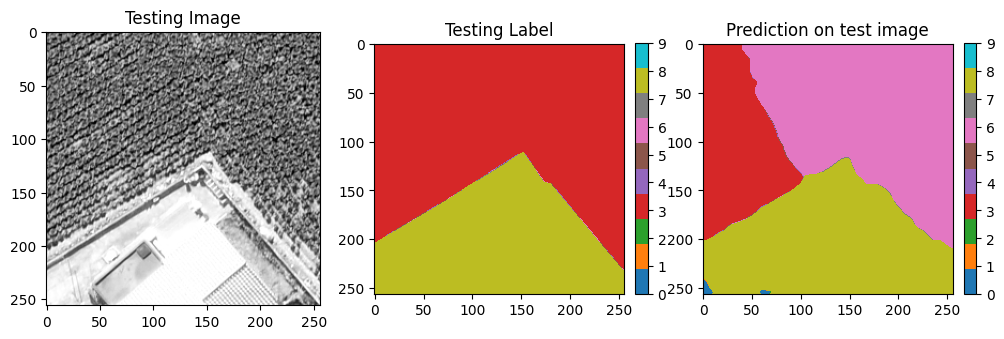

test_img_input의 shape:  (1, 256, 256, 3)
1/1 [==============================] - 0s 31ms/step


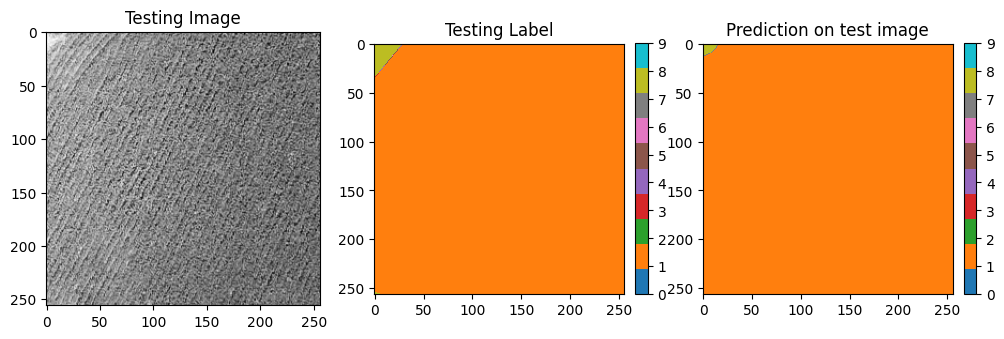

In [ ]:
from matplotlib.colors import ListedColormap

# Create a colormap
cmap = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Predict on a few images
#model = get_model()
#model.load_weights('???.hdf5')
import random
for i in range(10):
  test_img_number = random.randint(0, len(test_image_batch)-1)
  test_img = test_image_batch[test_img_number]
  ground_truth=test_mask_batch[test_img_number]
  ground_truth = np.argmax(ground_truth, axis=2)
  test_img_norm = test_img[:,:,:]
  test_img_input = np.expand_dims(test_img_norm, 0)
  print("test_img_input의 shape: ", test_img_input.shape)

  prediction = (model.predict(test_img_input))
  predicted_img=np.argmax(prediction, axis=3)[0,:,:]

  plt.figure(figsize=(12, 8))

  # Testing Image
  plt.subplot(131)
  plt.title('Testing Image')
  plt.imshow(test_img[:,:,0], cmap='gray')

  # Testing Label
  plt.subplot(132)
  plt.title('Testing Label')
  im1 = plt.imshow(ground_truth, cmap=cmap, vmin=0, vmax=9)    # vmin, vmax to set the colorbar range
  plt.colorbar(im1, fraction=0.046, pad=0.04, ticks=range(10))  # ticks to set the colorbar ticks

  # Prediction on test image
  plt.subplot(133)
  plt.title('Prediction on test image')
  im2 = plt.imshow(predicted_img, cmap=cmap, vmin=0, vmax=9)  # vmin, vmax to set the colorbar range
  plt.colorbar(im2, fraction=0.046, pad=0.04, ticks=range(10))  # ticks to set the colorbar ticks

  plt.show()
